<a href="https://colab.research.google.com/github/SayuruA/Basics-of-Image-Processing/blob/main/Fitting_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# image path
im_path = "/content/drive/MyDrive/ImageProcessing/Images-20240814/fitting/the_berry_farms_sunflower_field.jpeg"

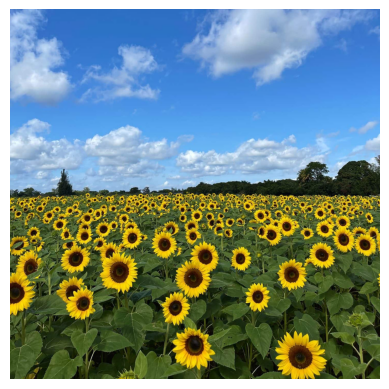

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# show image
im = cv.imread(im_path)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()



### Using the available blob detector.

---



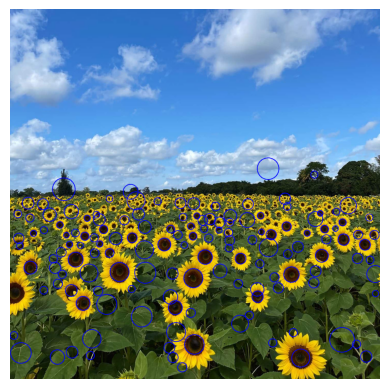

In [83]:
# Read image
im_color = cv.imread(im_path, cv.IMREAD_COLOR)
im_color= cv.cvtColor(im_color, cv.COLOR_BGR2RGB)

im = cv.cvtColor(im_color, cv.COLOR_BGR2HSV)[:,:,2]


params = cv.SimpleBlobDetector_Params()

# # Change thresholds
# params.minThreshold = 0;
# params.maxThreshold = 10000;

# Filter by Area.
params.filterByArea = True
params.minArea = 400

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im)

for keypoint in keypoints:
    x, y = int(keypoint.pt[0]), int(keypoint.pt[1])
    radius = int(keypoint.size / 2)
    cv.circle(im_color, (x, y), radius, (0, 0, 255), thickness=2)


# Show keypoints
plt.imshow(im_color)
plt.axis('off')
plt.show()


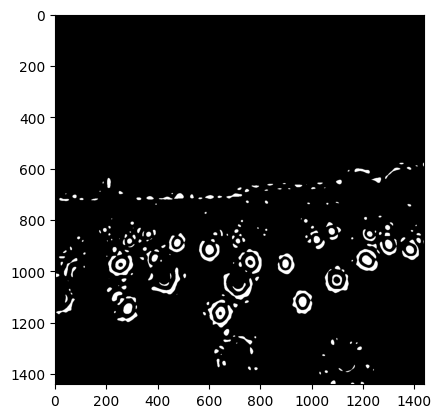

In [230]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blob_detector(image)

# Load image
image = cv2.imread(im_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,2]


# cast the image into float 64
image = image.astype(np.float64)

sigma = 10
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (0,0), sigma)

# Scale the result by sigma^2
scaled_image = blurred_image * (sigma ** 2)
# Apply Laplacian of Gaussian
log_image = cv2.Laplacian(scaled_image, cv2.CV_64F)

# Convert back to uint8
log_image_formatted = np.uint8(np.absolute(log_image))

# Threshold the image (optional, depending on desired result)
_, thresholded = cv2.threshold(log_image_formatted, 50, 255, cv2.THRESH_BINARY)

# Display the result
plt.imshow(thresholded, cmap='gray')

plt.show()


In [242]:


def blob_detector(image, sigma, th_ = False, th = 50):

  import cv2
  import numpy as np
  import matplotlib.pyplot as plt
  # Load image



  # cast the image into float 64
  image = image.astype(np.float64)


  # Apply Gaussian blur
  blurred_image = cv2.GaussianBlur(image, (0,0), sigma)

  # Scale the result by sigma^2
  scaled_image = blurred_image * (sigma ** 2)
  # Apply Laplacian of Gaussian
  log_image = cv2.Laplacian(scaled_image, cv2.CV_64F)

  # Convert back to uint8
  log_image_formatted = np.uint8(np.absolute(log_image))

  # Threshold the image (optional, depending on desired result)
  if th_ == True:
    _, thresholded = cv2.threshold(log_image_formatted, th, 255, cv2.THRESH_BINARY)
  else:
    thresholded = log_image_formatted

  return thresholded


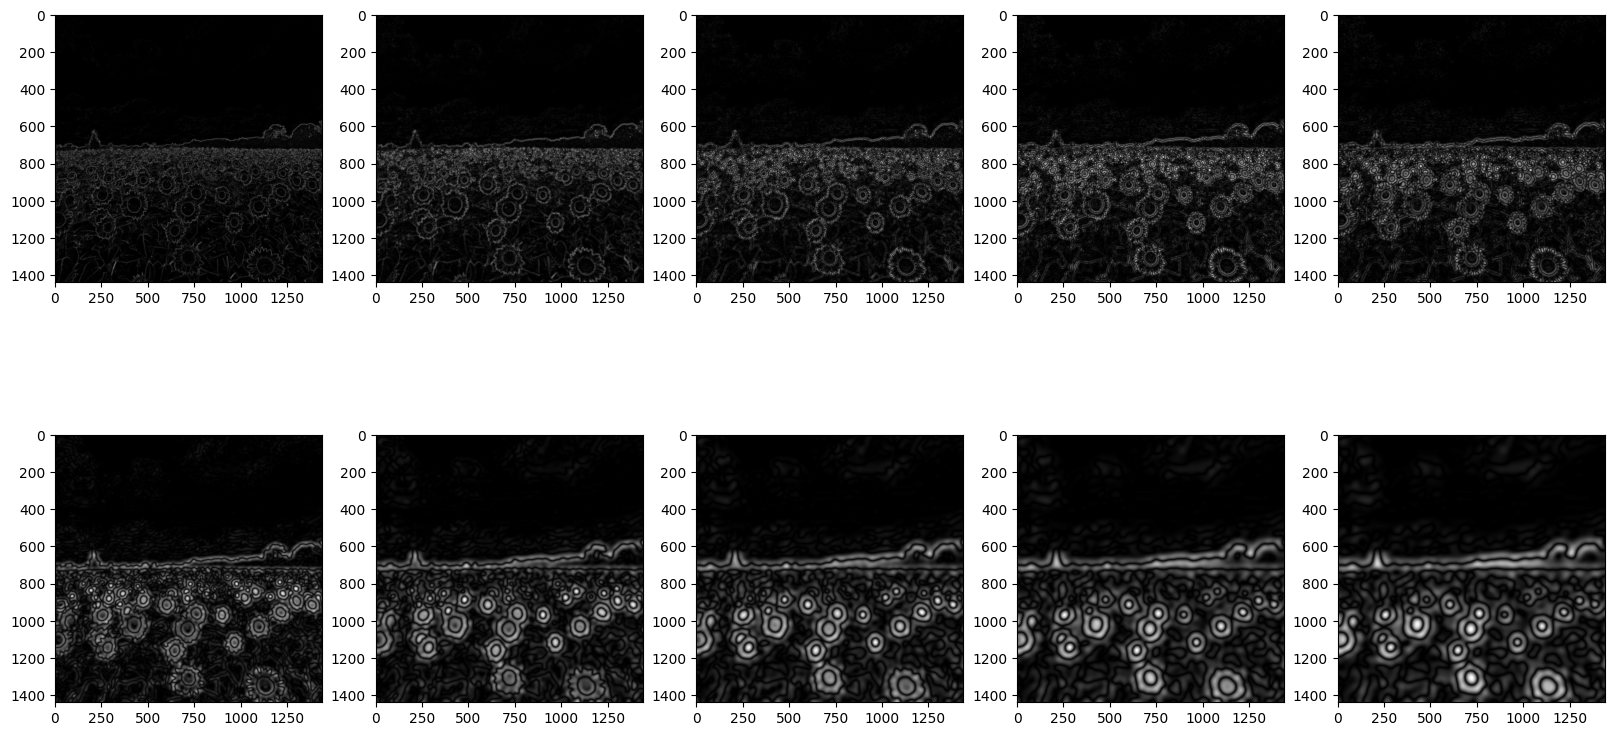

In [248]:
image = cv2.imread(im_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,2]

# th = 50
# sigma = 10
# thresholded = blob_detector(image, sigma, False, 10)

sigmas = [1, 2, 3, 4, 5, 8, 12, 15, 18, 20]
scaleSpace = np.zeros((len(sigmas), image.shape[0], image.shape[1]))
for sigma in sigmas:
  thresholded = blob_detector(image, sigma)
  scaleSpace[sigmas.index(sigma)] = thresholded

# plot all the images in the scaleSpace
fig, ax = plt.subplots(2, len(sigmas)//2, figsize=(20, 10))
for i in range(len(sigmas)):
  if i < len(sigmas)//2:
    ax[0, i].imshow(scaleSpace[i], cmap='gray')
  else:
    ax[1, i-len(sigmas)//2].imshow(scaleSpace[i], cmap='gray')







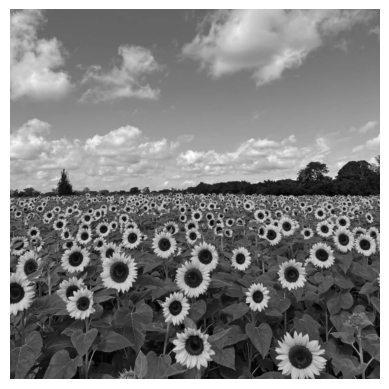

In [144]:
plt.imshow(blurred_image, cmap ="gray")
plt.axis('off')
plt.show()

In [173]:
blurred_image

array([[154.59563374, 154.59429348, 154.59027323, ..., 125.76045924,
        125.75859269, 125.75797033],
       [154.59631606, 154.59497583, 154.59095564, ..., 125.76022457,
        125.75835807, 125.75773573],
       [154.59836522, 154.59702504, 154.59300504, ..., 125.75952097,
        125.75765463, 125.75703234],
       ...,
       [ 67.64056645,  67.64033598,  67.63964113, ...,  68.61666417,
         68.61520559,  68.61471861],
       [ 67.64024472,  67.64001425,  67.63931944, ...,  68.61628311,
         68.61482437,  68.61433734],
       [ 67.64013806,  67.6399076 ,  67.63921281, ...,  68.61615532,
         68.61469653,  68.61420948]])

In [220]:
abs(log_image_formatted).max()

105

In [201]:
log_image_formatted

array([[13, 13, 13, ...,  7,  7,  7],
       [13, 13, 13, ...,  7,  7,  7],
       [13, 13, 13, ...,  7,  7,  7],
       ...,
       [ 2,  2,  2, ..., 12, 12, 12],
       [ 2,  2,  2, ..., 12, 12, 12],
       [ 2,  2,  2, ..., 12, 12, 12]], dtype=uint8)

In [202]:
thresholded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
image = np.ones((100, 100), dtype=np.uint8) * 255
blurred_image = cv2.GaussianBlur(image, (21, 21), 0)

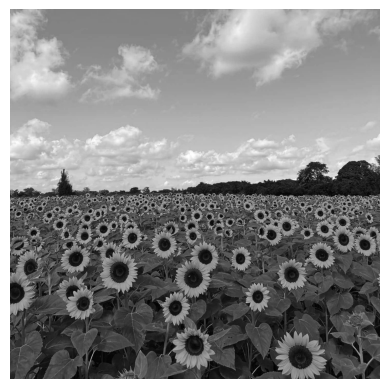

In [63]:
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [44]:
ver = (cv.__version__).split('.')
ver

['4', '10', '0']

In [39]:
test1 = im[:4,:4,0]
test2 = test1 * 1.5
test2 = test2.astype(np.uint8)
print(test1)
print("************\n" ,test2)

[[90 90 91 92]
 [90 90 91 92]
 [90 90 91 92]
 [90 90 91 92]]
************
 [[135 135 136 138]
 [135 135 136 138]
 [135 135 136 138]
 [135 135 136 138]]


In [38]:
test2.dtype

dtype('float64')